In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import os

In [30]:
df = pd.read_csv(r"houserentalprediction.txt")

In [31]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2.0,7.0,2.0,2.0,2.0,62000.0
1,2,2134.8,5.0,7.0,4.0,2.0,2.0,78000.0
2,3,1138.56,5.0,7.0,2.0,2.0,1.0,58000.0
3,4,1458.78,2.0,7.0,3.0,2.0,2.0,45000.0
4,5,967.776,11.0,14.0,3.0,2.0,2.0,45000.0


In [32]:
#we have to drop the unnamed columns
df.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [33]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2.0,7.0,2.0,2.0,2.0,62000.0
1,2134.8,5.0,7.0,4.0,2.0,2.0,78000.0
2,1138.56,5.0,7.0,2.0,2.0,1.0,58000.0
3,1458.78,2.0,7.0,3.0,2.0,2.0,45000.0
4,967.776,11.0,14.0,3.0,2.0,2.0,45000.0


In [34]:
df.shape

(646, 7)

In [35]:
#today we'll make a model using a pipeline maker
from sklearn.pipeline import make_pipeline

In [47]:
y = df.Price
X = df.drop('Price', axis = 1)

In [48]:
X.tail()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
640,1359.156,7.0,15.0,3.0,2.0,2.0
641,377.148,4.0,10.0,1.0,1.0,1.0
642,740.064,13.0,14.0,1.0,1.0,1.0
643,1707.84,3.0,14.0,3.0,2.0,2.0
644,1376.946,6.0,7.0,3.0,2.0,1.0


In [38]:
#Lets see how the variables compare to Y, but before that lets check for missing values

In [39]:
df.isnull().sum()

Sqft           0
Floor          1
TotalFloor     1
Bedroom        1
Living.Room    1
Bathroom       1
Price          1
dtype: int64

In [43]:
df.tail()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
641,377.148,4.0,10.0,1.0,1.0,1.0,24800.0
642,740.064,13.0,14.0,1.0,1.0,1.0,45000.0
643,1707.84,3.0,14.0,3.0,2.0,2.0,65000.0
644,1376.946,6.0,7.0,3.0,2.0,1.0,36000.0
645,isActive:false},NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df.drop(645,axis = 0,inplace = True)

In [49]:
#now lets check missing values again
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [50]:
#all clean, lets plot the dist plots for each feature!

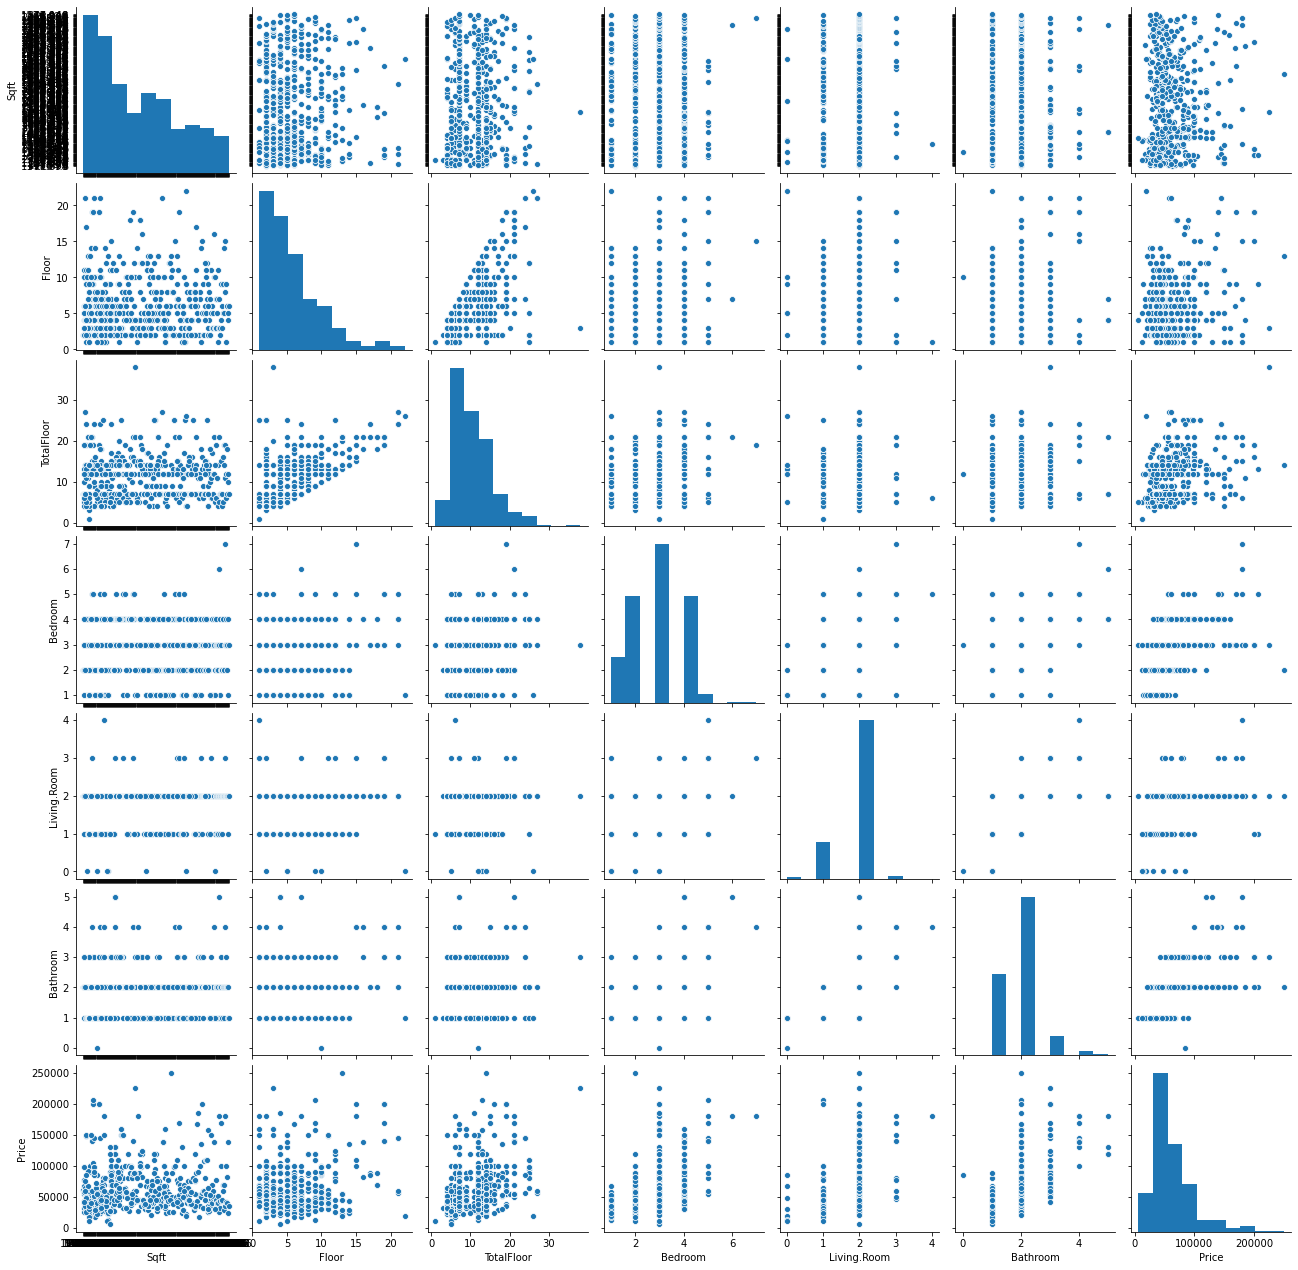

In [55]:
sns.pairplot(df)

In [56]:
corr = df.corr()

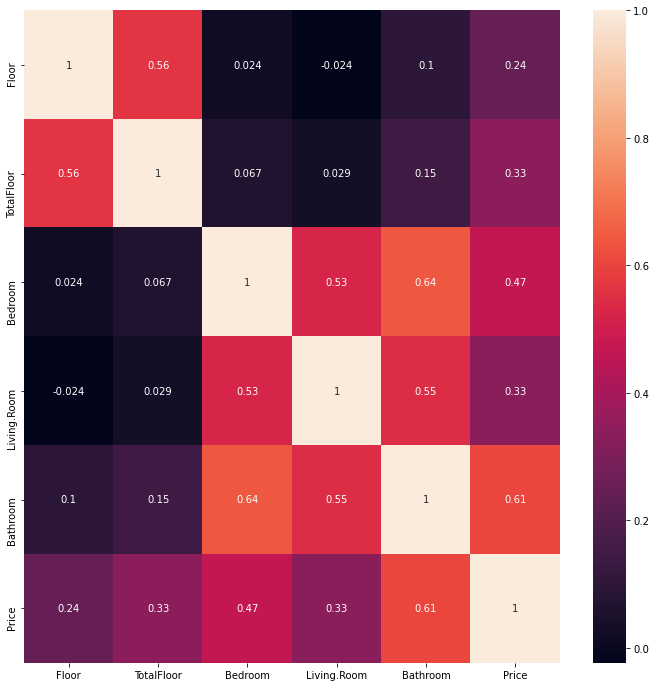

In [57]:
plt.figure(figsize = (12,12))
sns.heatmap(corr,annot = True)
plt.show()

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [59]:
lir_pipeline = make_pipeline(StandardScaler(),LinearRegression())

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

In [61]:
lir_pipeline.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [62]:
print(lir_pipeline.score(X_train,y_train))

0.7165250802589176

In [64]:
print(lir_pipeline.score(X_test,y_test))

0.6523894789774944


In [71]:
from sklearn.ensemble import RandomForestRegressor
rf_pipeline = make_pipeline(StandardScaler(),RandomForestRegressor())
rf_pipeline.fit(X_train,y_train)
print(rf_pipeline.score(X_train,y_train))
print(rf_pipeline.score(X_test,y_test))

0.9627887778580478
0.8080013383586406


In [72]:
from sklearn.tree import DecisionTreeRegressor
dt_pipeline = make_pipeline(StandardScaler(),DecisionTreeRegressor())
dt_pipeline.fit(X_train,y_train)
print(dt_pipeline.score(X_train,y_train))
print(dt_pipeline.score(X_test,y_test))

0.999689359418199
0.6431462011722531


In [76]:
from sklearn.neighbors import KNeighborsRegressor
knn_pipeline = make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors = 2))
knn_pipeline.fit(X_train,y_train)
print(knn_pipeline.score(X_train,y_train))
print(knn_pipeline.score(X_test,y_test))

0.8852566398144489
0.7038105213455992
